In [26]:
import os
import glob
import collections
import pandas as pd
import pickle

import numpy as np
import matplotlib.pyplot as plt

pth_dict = {
    4: {
        "pythia-410m": "./results/n-grams/wmt09_gens/pile/410m/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "./results/n-grams/wmt09_gens/pile/exp_3/test-set/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl"
    },

    2: {
        "pythia-410m": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-12b/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
    }
}

def load_dfs(pth_dict):
    dfs = {}
    for k, v in pth_dict.items():
        dfs[k] = {}
        for model, pth in v.items():
            with open(pth, "rb") as f:
                df = pickle.load(f)[model]
                # if k > 2:
                #     df = df[df['alignment_score'] >= 0.9]
                dfs[k][model] = df
    return dfs

dfs = load_dfs(pth_dict)


base_save_pth = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/figures/translation/dist/alignment"

In [27]:
df_4_12b = dfs[4]["pythia-12b"]
df_4_410m = dfs[4]["pythia-410m"]

Saved to /share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/figures/translation/dist/alignment/alignment_score_distribution_4.pdf


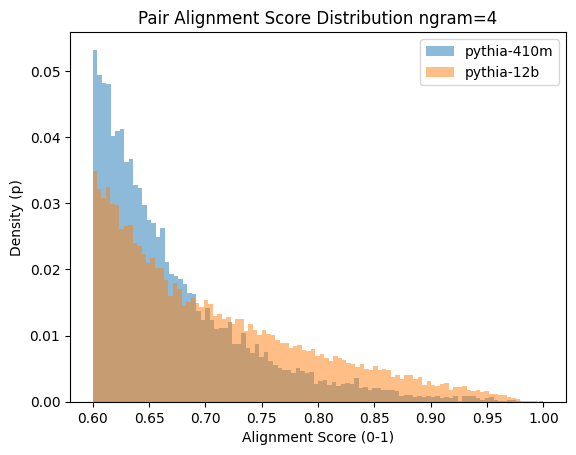

In [28]:
# plt.hist(df_4_12b["alignment_score"], bins=100)
# plt.hist(df_4_410m["alignment_score"], bins=100)

"""
alignment score distribution:
this is just to how that in general,
the generations of the model, match
better aligned pairs from the pretraining data

note: still confounding variables
key: move beyond this to composability
"""

def plot_distribution(df_dict, variable):
    for k, v in df_dict.items():
        values = v[variable]
        weights = np.ones_like(values) / float(len(values))
        plt.hist(values, bins=100, weights=weights, alpha=0.5, label=k)
    plt.xlabel("Alignment Score (0-1)")
    plt.ylabel("Density (p)")
    plt.legend()

plot_distribution(dfs[4], "alignment_score")
plt.title("Pair Alignment Score Distribution ngram=4")

save_path = os.path.join(base_save_pth, "alignment_score_distribution_4.pdf")
plt.savefig(save_path)
print(f"Saved to {save_path}")

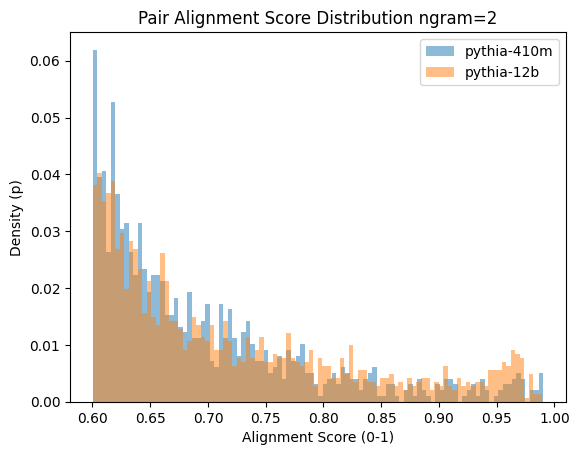

In [30]:
plot_distribution(dfs[2], "alignment_score")
plt.title("Pair Alignment Score Distribution ngram=2") 
save_path = os.path.join(base_save_pth, "alignment_score_distribution_2.pdf")
plt.savefig(save_path)


In [7]:
dfs.keys()

dict_keys([4, 2])

aligning 0.9
aligning 0.9
-- model: pythia-410m --
n: 2: 985, n: 4: 149, ratio: 6.610738255033557
-- model: pythia-12b --
n: 2: 1415, n: 4: 1078, ratio: 1.3126159554730983


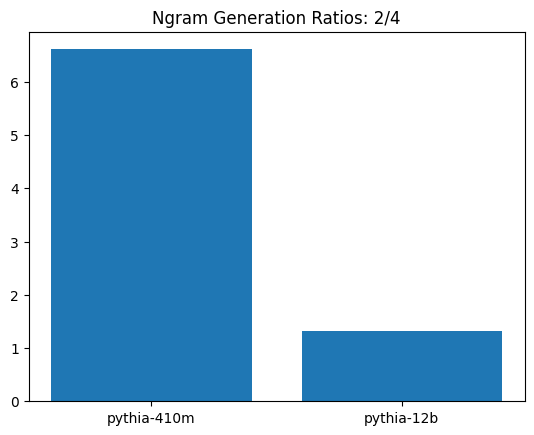

In [8]:
def compare_ngram_dist(dfs, ngrams):
    ngrams = sorted(ngrams)
    ngram_dists = collections.defaultdict(dict)
    for ngram in ngrams:
        for model, df in dfs[ngram].items():
            # find unique lang_1, lang_2 pairs
            if ngram > 2:
                print(f"aligning 0.9")
                df = df[df['alignment_score'] >= 0.9]
            ngram_dists[ngram][model] = df[['lang_1', 'lang_2']].drop_duplicates(inplace=False)

    # # plot normalized distribution of ngrams for models
    # for model in dfs[ngrams[0]].keys():
    #     plt.figure()
    #     for ngram in ngrams:
    #         ngram_dists[ngram][model].plot.hist(bins=100, alpha=0.5, label=ngram)
    #     plt.legend()
    #     plt.title(f"ngram distribution for {model}")

    # compute ratios
    ngram_rations = {}
    for model in dfs[ngrams[0]].keys():
        ngram_rations[model] = {}
        ngram_rations[model] = len(ngram_dists[ngrams[0]][model]) / len(ngram_dists[ngrams[1]][model])
        print(f"-- model: {model} --")
        print(f"n: {ngrams[0]}: {len(ngram_dists[ngrams[0]][model])}, n: {ngrams[1]}: {len(ngram_dists[ngrams[1]][model])}, ratio: {ngram_rations[model]}")
    
    # plot ratios as bar chart
    plt.figure()
    plt.title(f"Ngram Generation Ratios: {ngrams[0]}/{ngrams[1]}")
    plt.bar(ngram_rations.keys(), ngram_rations.values())

    return ngram_dists

ngram_dists = compare_ngram_dist(dfs, [2, 4])

In [9]:
df_4_12b

,lang_1,lang_2,value,example,task,pair,example_clean,coverage,alignment_score,query,sum,count,id,gold,src,ref,result,bleu
0,in the case of,en el caso de,90090,"{'translation': {'en': 'Nevertheless, he said ...",en-es,"(in the case of, en el caso de)","Nevertheless, he said that in the case of Petr...",0.277024,0.944272,"{'translation': {'en': 'Nevertheless, he said ...",286925,118,1354_0,0,"Nevertheless, he said that in the case of Petr...","Sin embargo, manifestó que en el caso de Petr ...","Sin embargo, dijo que en el caso de Petr Švác...",41.413339
1,of which the matter,de la cual la,209,"{'translation': {'en': 'Nevertheless, he said ...",en-es,"(of which the matter, de la cual la)","Nevertheless, he said that in the case of Petr...",0.277024,0.662424,"{'translation': {'en': 'Nevertheless, he said ...",286925,118,1354_0,0,"Nevertheless, he said that in the case of Petr...","Sin embargo, manifestó que en el caso de Petr ...","Sin embargo, dijo que en el caso de Petr Švác...",41.413339
2,he said that in,en el caso de,5438,"{'translation': {'en': 'Nevertheless, he said ...",en-es,"(he said that in, en el caso de)","Nevertheless, he said that in the case of Petr...",0.277024,0.640220,"{'translation': {'en': 'Nevertheless, he said ...",286925,118,1354_0,0,"Nevertheless, he said that in the case of Petr...","Sin embargo, manifestó que en el caso de Petr ...","Sin embargo, dijo que en el caso de Petr Švác...",41.413339
3,in the case of,que en el caso,5001,"{'translation': {'en': 'Nevertheless, he said ...",en-es,"(in the case of, que en el caso)","Nevertheless, he said that in the case of Petr...",0.277024,0.778663,"{'translation': {'en': 'Nevertheless, he said ...",286925,118,1354_0,0,"Nevertheless, he said that in the case of Petr...","Sin embargo, manifestó que en el caso de Petr ...","Sin embargo, dijo que en el caso de Petr Švác...",41.413339
4,under the jurisdiction of,que en el caso,5001,"{'translation': {'en': 'Nevertheless, he said ...",en-es,"(under the jurisdiction of, que en el caso)","Nevertheless, he said that in the case of Petr...",0.277024,0.601848,"{'translation': {'en': 'Nevertheless, he said ...",286925,118,1354_0,0,"Nevertheless, he said that in the case of Petr...","Sin embargo, manifestó que en el caso de Petr ...","Sin embargo, dijo que en el caso de Petr Švác...",41.413339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31704,On one hand the,"En un lado, el",1,"{'translation': {'en': 'On one hand, the artis...",en-es,"(On one hand the, En un lado, el)","On one hand, the artist.",0.277024,0.706776,"{'translation': {'en': 'On one hand, the artis...",1,1,2274_0,0,"On one hand, the artist.",A un lado el artista.,"En un lado, el artista.",30.739408
31705,and Luxembourg governments partially,"Mientras tanto, los gobiernos",1,"{'translation': {'en': 'Meanwhile, the Belgian...",en-es,"(and Luxembourg governments partially, Mientra...","Meanwhile, the Belgian, Dutch and Luxembourg g...",0.277024,0.668436,"{'translation': {'en': 'Meanwhile, the Belgian...",1,1,2085_0,0,"Meanwhile, the Belgian, Dutch and Luxembourg g...","Mientras tanto, los gobiernos belga, holandés ...","Mientras tanto, los gobiernos belga, holandés...",44.609787
31706,not taking any risks,no voy a arriesgarme.,1,"{'translation': {'en': 'I've switched, I'm not...",en-es,"(not taking any risks, no voy a arriesgarme.)","I've switched, I'm not taking any risks.""",0.277024,0.760166,"{'translation': {'en': 'I\'ve switched, I\'m n...",1,1,1746_0,0,"I've switched, I'm not taking any risks.""","La conmutación está hecha, no estoy tomando al...","He cambiado, no voy a arriesgarme.",7.413670
31707,and my dress is,y mi vestido es,1,"{'translation': {'en': 'I have dark hair, am a...",en-es,"(and my dress is, y mi vestido es)","I have dark hair, am a student, and my dress i...",0.277024,0.932290,"{'translation': {'en': 'I have dark hair, am a...",1,1,85_0,0,"I have dark hair, am a student, and my dress i...","Tengo el pelo de color 